In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

#get data on impact category
file_path = "/Users/emilioes/Desktop/PhD/1/Meta-Lit Analysis.xlsx"
data = pd.read_excel(file_path, header=2)
data = data[data["Include in Paper"] == "Yes"]  
data = data.dropna(subset=["FEU (KgPO4)"]) 
data["FEU (KgPO4)"] = pd.to_numeric(data["FEU (KgPO4)"], errors="coerce")  

#convert FU to PE yr
def convert_to_pe_per_year(fu_value, value_column):
    if isinstance(fu_value, str):  # Ensure we are working with string values
        fu_value = fu_value.strip()
        if "PR ye" in fu_value:
            return value_column
        elif "PE" in fu_value:
            number_match = re.search(r"(\d+)\s*PE", fu_value)
            if number_match:
                number_before_pe = int(number_match.group(1))
                return value_column / number_before_pe
        elif "m3" in fu_value:
            return (value_column / 5) * 365
    return value_column


data["Converted_FEU (KgPO4)"] = data.apply(lambda row: convert_to_pe_per_year(row["FU"], row["FEU (KgPO4)"]), axis=1)

#get most contributing configurations
top_10_FEU = data[["ID", "WWT Group", "Converted_FEU (KgPO4)"]].nlargest(10, "Converted_FEU (KgPO4)")
print("\nTop 10 values for FEU (KgPO4) (PE per year):")
print(top_10_FEU[["ID", "WWT Group", "Converted_FEU (KgPO4)"]])


print("\nNumber of values in each WWT Group:")
print(data["WWT Group"].value_counts())





Top 10 values for FEU (KgPO4) (PE per year):
     ID          WWT Group  Converted_FEU (KgPO4)
97    9       Conventional               6.080000
96    9  Source Separation               2.380000
167  21                NBS               2.190000
168  21                NBS               2.190000
169  21                NBS               2.190000
123  14            On-site               1.666667
175  22                 CW               1.496500
177  22                 CW               1.496500
124  14            On-site               1.400000
176  22                 CW               1.387000

Number of values in each WWT Group:
WWT Group
Source Separation    75
Conventional         19
CW                   13
On-site              11
NBS                   8
Name: count, dtype: int64


/var/folders/f_/84vnntp95_51q2241cz9_31w0000gq/T/ipykernel_5427/2008783887.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="WWT Group", y="Converted_FEU (KgPO4)", data=data, jitter=True, palette="viridis", dodge=False, zorder=1)


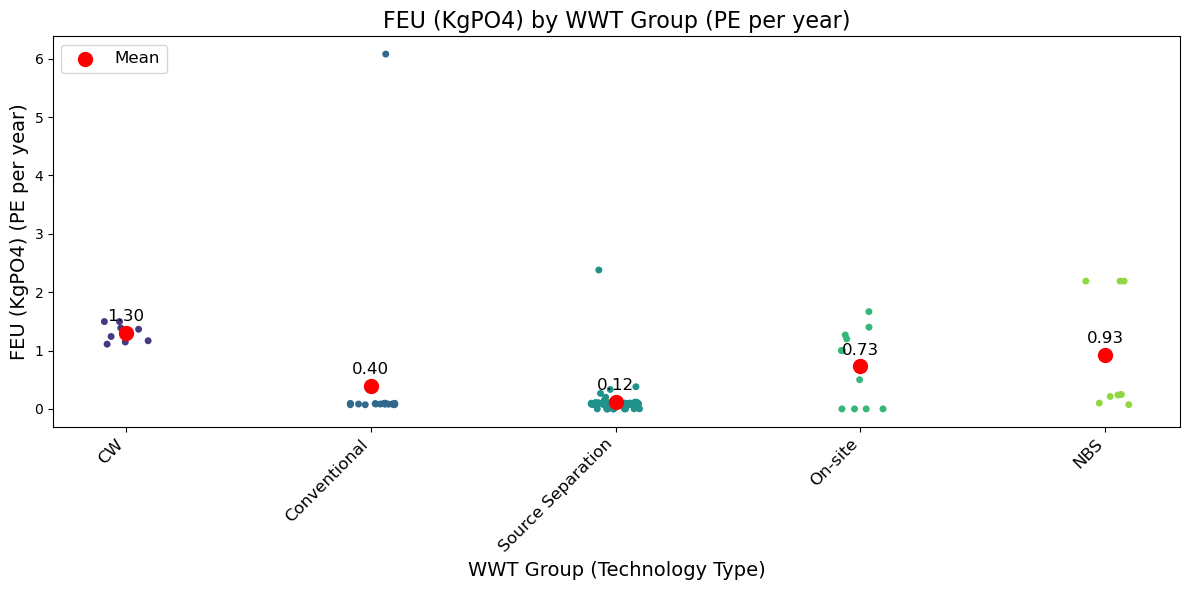

In [45]:
plt.figure(figsize=(12, 6))

sns.stripplot(x="WWT Group", y="Converted_FEU (KgPO4)", data=data, jitter=True, palette="viridis", dodge=False, zorder=1)

# Calculate the mean values
mean_values = data.groupby("WWT Group")["Converted_FEU (KgPO4)"].mean()
for group, mean_val in mean_values.items():
    plt.scatter(group, mean_val, color='red', marker='o', s=100, zorder=2)  # Ensure mean is on top
    plt.text(group, mean_val + 0.15, f'{mean_val:.2f}', color='black', ha='center', va='bottom', fontsize=12, zorder=3)

#plot
plt.scatter([], [], color='red', marker='o', s=100, label="Mean")

plt.title("FEU (KgPO4) by WWT Group (PE per year)", fontsize=16)
plt.xlabel("WWT Group (Technology Type)", fontsize=14)
plt.ylabel("FEU (KgPO4) (PE per year)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)


plt.legend(loc="upper left", fontsize=12)

plt.tight_layout()


plt.show()
